# What is the True Normal Human Body Temperature? 

#### Background

The mean normal body temperature was held to be 37$^{\circ}$C or 98.6$^{\circ}$F for more than 120 years since it was first conceptualized and reported by Carl Wunderlich in a famous 1868 book. But, is this value statistically correct?

<h3>Exercises</h3>

<p>In this exercise, you will analyze a dataset of human body temperatures and employ the concepts of hypothesis testing, confidence intervals, and statistical significance.</p>

<p>Answer the following questions <b>in this notebook below and submit to your Github account</b>.</p> 

<ol>
<li>  Is the distribution of body temperatures normal? 
    <ul>
    <li> Although this is not a requirement for the Central Limit Theorem to hold (read the introduction on Wikipedia's page about the CLT carefully: https://en.wikipedia.org/wiki/Central_limit_theorem), it gives us some peace of mind that the population may also be normally distributed if we assume that this sample is representative of the population.
    <li> Think about the way you're going to check for the normality of the distribution. Graphical methods are usually used first, but there are also other ways: https://en.wikipedia.org/wiki/Normality_test
    </ul>
<li>  Is the sample size large? Are the observations independent?
    <ul>
    <li> Remember that this is a condition for the Central Limit Theorem, and hence the statistical tests we are using, to apply.
    </ul>
<li>  Is the true population mean really 98.6 degrees F?
    <ul>
    <li> First, try a bootstrap hypothesis test.
    <li> Now, let's try frequentist statistical testing. Would you use a one-sample or two-sample test? Why?
    <li> In this situation, is it appropriate to use the $t$ or $z$ statistic? 
    <li> Now try using the other test. How is the result be different? Why?
    </ul>
<li>  Draw a small sample of size 10 from the data and repeat both frequentist tests. 
    <ul>
    <li> Which one is the correct one to use? 
    <li> What do you notice? What does this tell you about the difference in application of the $t$ and $z$ statistic?
    </ul>
<li>  At what temperature should we consider someone's temperature to be "abnormal"?
    <ul>
    <li> As in the previous example, try calculating everything using the boostrap approach, as well as the frequentist approach.
    <li> Start by computing the margin of error and confidence interval. When calculating the confidence interval, keep in mind that you should use the appropriate formula for one draw, and not N draws.
    </ul>
<li>  Is there a significant difference between males and females in normal temperature?
    <ul>
    <li> What testing approach did you use and why?
    <li> Write a story with your conclusion in the context of the original problem.
    </ul>
</ol>

You can include written notes in notebook cells using Markdown: 
   - In the control panel at the top, choose Cell > Cell Type > Markdown
   - Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

#### Resources

+ Information and data sources: http://www.amstat.org/publications/jse/datasets/normtemp.txt, http://www.amstat.org/publications/jse/jse_data_archive.htm
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

****

In [71]:
import pandas as pd
import math
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm
import sklearn 
import scipy
import warnings
warnings.filterwarnings("ignore")

df = pd.read_csv('data/human_body_temperature.csv')

In [2]:
print(df.dtypes)

temperature    float64
gender          object
heart_rate     float64
dtype: object


In [2]:
# Want to turn males and females into numbers to handle more easily in the future. Females = 0, Males = 1
df = df.apply(lambda x: x.replace('M','1'))
df = df.apply(lambda x: x.replace('F','0'))
df.gender = pd.to_numeric(df.gender)
df = df.sort_values('temperature')

100.8 96.3


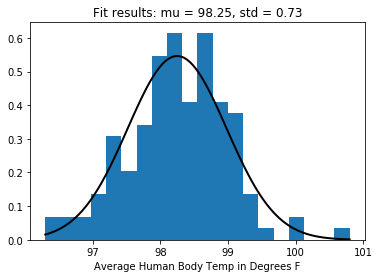

In [3]:
# 1.) Decided to fit a gaussian curve to the data to see if they lined up enough to call it normally distributed.
mu = np.mean(df.temperature)
sigma = np.std(df.temperature)
print(df.temperature.max(),df.temperature.min())
plt.hist(df.temperature, bins = 20, normed = True)
x = np.linspace(100.8, 96.3, 100)
p = norm.pdf(x, mu, sigma)
plt.plot(x, p ,'k', linewidth = 2)
_ = plt.xlabel("Average Human Body Temp in Degrees F")
title = "Fit results: mu = %.2f, std = %.2f" %(mu, sigma)
plt.title(title)
plt.show()

In [4]:
# 2.) Is the sample size large? Are the observations independent?
# Sample size over 60 so rule of thumb says our sample is big enough
# Assuming 95% confidence
# z-score = 1.96 
z = 1.96
# For Margin of Error
m = z * (sigma/(np.sqrt(mu)))
m 
# Since our sample size is under 10% of the human population at them time, it is safe to say they're independednt

0.1444199369878666

In [ ]:
# 3.)Is the true population mean really 98.6 degrees F?
# First, try a bootstrap hypothesis test.
# Now, let's try frequentist statistical testing. Would you use a one-sample or two-sample test? Why?
# In this situation, is it appropriate to use the  𝑡  or  𝑧  statistic?
# Now try using the other test. How is the result be different? Why?

In [25]:
#Bootstrappin'
est_mean = 98.6
means = []
for x in range(50):
    bs_sample = np.random.choice(df.temperature, size = len(df))
    means.append(np.mean(bs_sample))
bs_mean = np.mean(means)
diff = (np.absolute((bs_mean-est_mean))/est_mean)*100
print(diff, sigma)

0.35383055078794634 0.7303577789050376


In [27]:
# Freq stat test
n = len(df)
#  We would use one-sample since we are comparing the bs to the mean of our data
z1 = (mu - est_mean)/(sigma/np.sqrt(n))
p1 = scipy.stats.norm.sf(abs(z1))*2
print(z1)
print(p1)


-5.475925202078339
4.352315165876703e-08


In [ ]:
# In this situation, is it appropriate to use the  𝑡  or  𝑧  statistic?
# z statistic since our sample size is greater than 30

In [28]:
# Now try using the other test. How is the result be different? Why?
# Freq stat test
n = len(df)
#  We would use one-sample since we are comparing the bs to the mean of our data
t1 = (mu - est_mean)/(sigma/np.sqrt(n))
p1 = scipy.stats.t.sf(abs(t1), n-1)*2
print(t1)
print(p1)
# Turns out we get exactly the same results as the Z-test. Since the z-test assumes a normal distribution and our t-test does
# not, then it is safe to assume that if their results agree, then we must have a normal distribution.

-5.475925202078339
2.188746462407283e-07


In [ ]:
# 4.) Draw a small sample of size 10 from the data and repeat both frequentist tests.
# Which one is the correct one to use?
# What do you notice? What does this tell you about the difference in application of the  𝑡  and  𝑧  statistic?

In [18]:
#Draw a small sample of size 10 from the data and repeat both frequentist tests.
est_mean = 98.6
means = []
for x in range(50):
    bs_sample = np.random.choice(df.temperature, size = 10)
    means.append(np.mean(bs_sample))
bs_mean = np.mean(means)
diff = (np.absolute((bs_mean-est_mean))/est_mean)*100
print(diff, sigma)

0.3190669371196741 0.7303577789050376


In [34]:
# Z-test
n = len(df)
#  We would use two-sample since we are comparing the bs to the mean of our data
sample = np.random.choice(df.temperature, size = 10)
new_mean = np.mean(sample)
z1 = (new_mean - est_mean)/(sigma/np.sqrt(n))
p1 = scipy.stats.norm.sf(abs(z1))*2
print(z1)
print(p1)

-3.746685664579613
0.0001791863916614935


In [61]:
# T-test
n = len(df)
#  We would use two-sample since we are comparing the bs to the mean of our data
sample = np.random.choice(df.temperature, size = 10)
new_mean = np.mean(sample)
t1 = (new_mean - est_mean)/(sigma/np.sqrt(n))
p1 = scipy.stats.t.sf(abs(t1), n-1)*2
print(t1)
print(p1)

-9.522826064140608
1.3193224982279918e-16


In [ ]:
# Which one is the correct one to use?
# t test since our sample size is under 30 

In [ ]:
#

In [ ]:
# 5.) At what temperature should we consider someone's temperature to be "abnormal"?
# As in the previous example, try calculating everything using the boostrap approach, as well as the frequentist approach.
# Start by computing the margin of error and confidence interval. When calculating the confidence interval, keep in mind that 
# you should use the appropriate formula for one draw, and not N draws.

In [86]:
#Bootstrappin'
est_mean = 98.6
means = []
for x in range(50):
    bs_sample = np.random.choice(df.temperature, size = len(df))
    means.append(np.mean(bs_sample))
bs_mean = np.mean(means)
sigma_means = np.std(means)
# With 95% confidence
z = 1.96
n = len(means)
moe = (sigma_means/n)*z
conf_int_up = bs_mean + (sigma_means/math.sqrt(n))*z
conf_int_down = bs_mean - (sigma_means/math.sqrt(n))*z
print(sigma_means, moe, + "(" + str(conf_int_down) + "," + str(conf_int_up) + ")")


TypeError: bad operand type for unary +: 'str'

In [ ]:
# 6.)Is there a significant difference between males and females in normal temperature?
# What testing approach did you use and why?
# Write a story with your conclusion in the context of the original problem.

In [83]:
males = df[df.gender =='M']
females = df[df.gender == 'F']
m_mean = np.mean(males.temperature)
f_mean = np.mean(females.temperature)
m_std = np.std(males.temperature)
f_std =np.std(females.temperature)
m_n = len(males)
f_n = len(females)
z1 = (m_mean - f_mean)/ np.sqrt(((m_std)**2/m_n) + ((f_std)**2/f_n))
p = scipy.stats.norm.sf(abs(z1))*2
print(m_mean, f_mean, m_std, f_std, m_n, f_n, z1, p)

98.1046153846154 98.39384615384613 0.6933598841828696 0.7377464486428966 65 65 -2.3032202891940123 0.02126645183012935


In [ ]:
# The value of p we got is less than the value of alpha, therefore, our alternate hypothesis of there being a significant
# difference between males and females in normal temperature is true